# Sublinear Domination and Core-periphery Structure : Supplementary Material

We first perform the necessary imports.

In [ ]:
import numpy as np
import networkx as nx
import collections
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
# from google.colab import drive
# drive.mount('/content/drive/')

sns.set_theme()

LARGE_SIZE = 16
plt.rc('axes', labelsize=LARGE_SIZE)
plt.rc('axes', titlesize=LARGE_SIZE)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## IGAM/IGAM2 Model

We now present the implementation for generating instances of the IGAM model. More specifically, the `generate_igam2` function is responsible for generating IGAM2 instances with

* height $H$
* core height $H_0 < H$
* fanout $b \in \mathbb Z_{\ge 2}$
* Scale parameters $c_1, c_2$ with $1 < c_1 < c_2 < b$. 

The law for generating the **IGAM2** model is given as

\begin{equation*}
    g(u, v) = \begin{cases}
        c_2^{-1-\min \{h(u), h(v) \}} & \max \{ h(u), h(v) \} > H_0 \\
        c_1^{-1-\min \{ h(u), h(v) \} } & \max \{ h(u), h(v) \} \le H_0 \\
    \end{cases}
\end{equation*}

Letting $c_1 = c_2$ the parameter $H_0$ becomes redundant and the law reduces to the **IGAM** law of edge generation

\begin{equation*}
  f(u, v) = c^{-1-\min \{ h(u), h(v) \}}
\end{equation*}

Below we give a plot of IGAM with parameters $H = 5$, $b = 2$ and $c = c_1 = c_2 = 1.5$. We also give plots of the pagerank vector computed for the particular instance with values sorted in ascending order.

In [ ]:
def generate_igam2(H=5, b=2, c1=1.5, c2=1.5, H0=2):
  G = nx.generators.classic.balanced_tree(r=b, h=H)
  n_i = b**H
  temp = np.log(b / c1)

  black = collections.defaultdict(bool)
  x_axis, y_axis = [], []
  edges_int = list(G.edges())
  edges_rnd = []
  nodelist = collections.defaultdict(list)

  height_histogram = np.zeros(H + 1)

  for u in G:
    for v in reversed(list(G.nodes())):
      hu = np.floor(np.log(u + 1) / np.log(b))
      hv = np.floor(np.log(v + 1) / np.log(b))
      un = np.random.uniform(low=0, high=1)
      nodelist[int(hu)].append(u)
      min_h = min(hu, hv)
      max_h = max(hu, hv)
      if max_h <= H0 + 1:
        if un <= c1**(-1 - min_h):
          G.add_edge(u, v)
          edges_rnd.append((u, v))
          height_histogram[int(hu)] += 1
          height_histogram[int(hv)] += 1
      else:
        if un <= c2**(-1 - min_h):
          G.add_edge(u, v)
          edges_rnd.append((u, v))
          height_histogram[int(hu)] += 1
          height_histogram[int(hv)] += 1

  G.remove_edges_from(edges_int)

  for u in G:
    black[u] = True
    for v in G.neighbors(u):
      black[v] = True
      x_axis.append((u + 1) / len(G) * 100)
      y_axis.append(len(black) / len(G) * 100)

  x_axis = np.array(x_axis)
  y_axis = np.array(y_axis)

  return G, x_axis, y_axis, height_histogram, nodelist, H, b, c1, c2, n_i

def plot_igam2(G, x_axis, y_axis, height_histogram, nodelist, H, b, c1, c2, n_i, suffix=''):
  plt.figure(figsize=(8, 8))
  plt.title('Domination Curve')
  plt.ylabel('Percentage of dominated external nodes (linear)')
  plt.xlabel('Percentage of internal nodes included by order of height (log)')
  plt.plot(x_axis, y_axis)
  plt.savefig('iga_curve_general{}.png'.format(suffix))

  plt.figure()
  rank_range = np.arange(H + 1)
  height_histogram = np.log(height_histogram)
  plt.plot(rank_range, height_histogram, linewidth=0, marker='x', color='r', label='Empirical Frequencies')
  plt.xlabel('Height')
  plt.ylabel('Number of Edges')
  p = np.polyfit(rank_range, height_histogram, deg=1)
  plt.plot(rank_range, p[0] * rank_range + p[1], label='$ y = {} x + {}$'.format(round(p[0], 2), round(p[1], 2)))
  plt.legend()

  print('Diameter:', nx.diameter(G))
  print('Theoretical Diameter:', np.log(b) / np.log(b/c2))
 
  fig, ax = plt.subplots(1, 1, figsize=(15, 15))
  pos = nx.shell_layout(G)
  for h, nodes in nodelist.items():
    nx.draw_networkx_nodes(G, nodelist=nodes + [0], ax=ax, pos=pos, node_color='b', node_size=50, alpha=(h / H))

  nx.draw_networkx_edges(G, edgelist=G.edges(), edge_color='r', pos=pos, alpha=0.3)
  plt.savefig('iga_general{}.png'.format(suffix))

  pr = nx.pagerank_numpy(G)
  pr_values = np.array(list(pr.values()))[:, np.newaxis].T
  sorted_pr_values = np.sort(pr_values)
  plt.figure(figsize=(30, 10))
  plt.imshow(sorted_pr_values)

  plt.figure(figsize=(10, 10))
  plt.imshow(nx.to_numpy_array(G))
  plt.savefig('igam2_adj{}.png'.format(suffix))

Diameter: 3
Theoretical Diameter: 2.4094208396532095


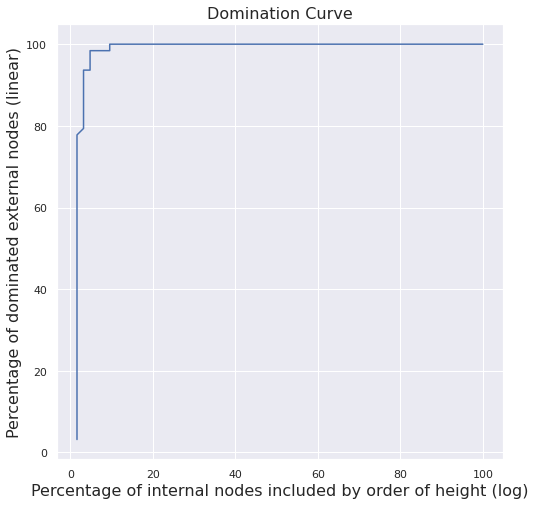

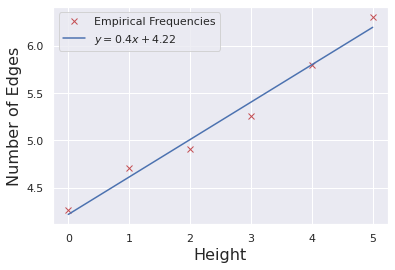

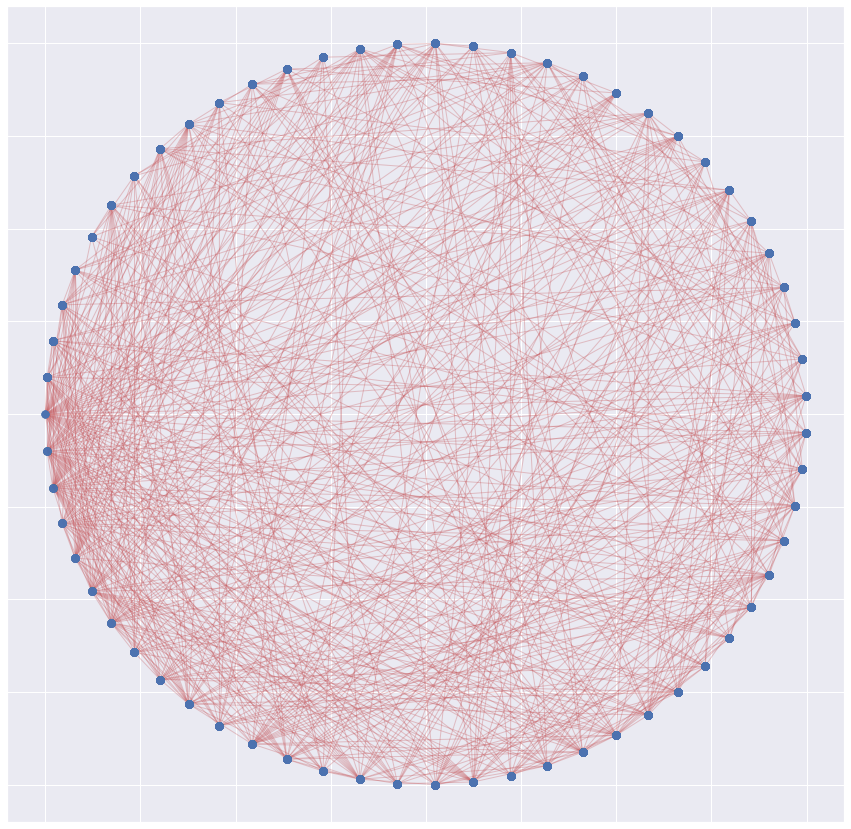

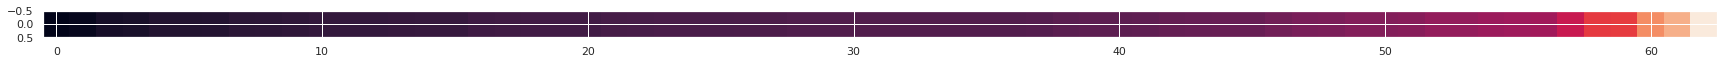

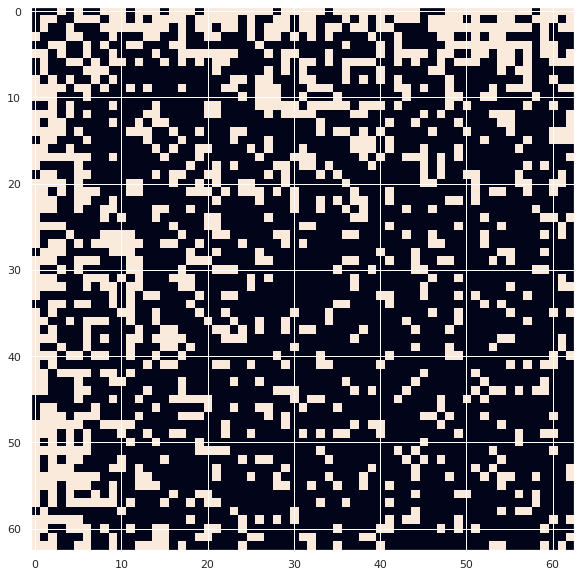

In [ ]:
G, x_axis, y_axis, height_histogram, nodelist, H, b, c1, c2, n_i = generate_igam2()
plot_igam2(G, x_axis, y_axis, height_histogram, nodelist, H, b, c1, c2, n_i, suffix='_simple_igam')

Diameter: 3
Theoretical Diameter: 2.4094208396532095


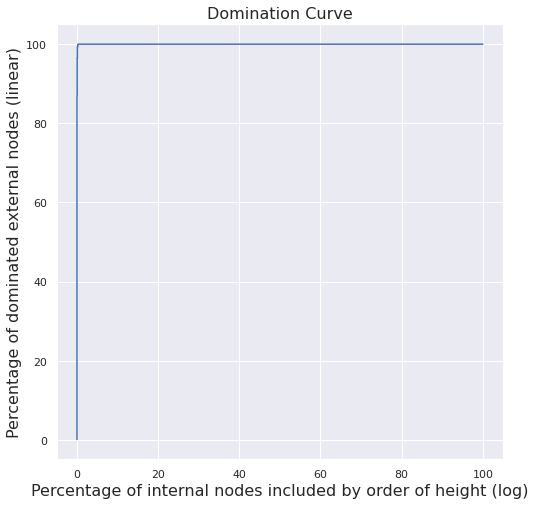

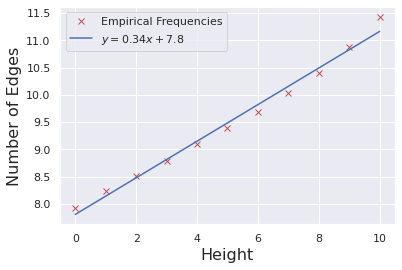

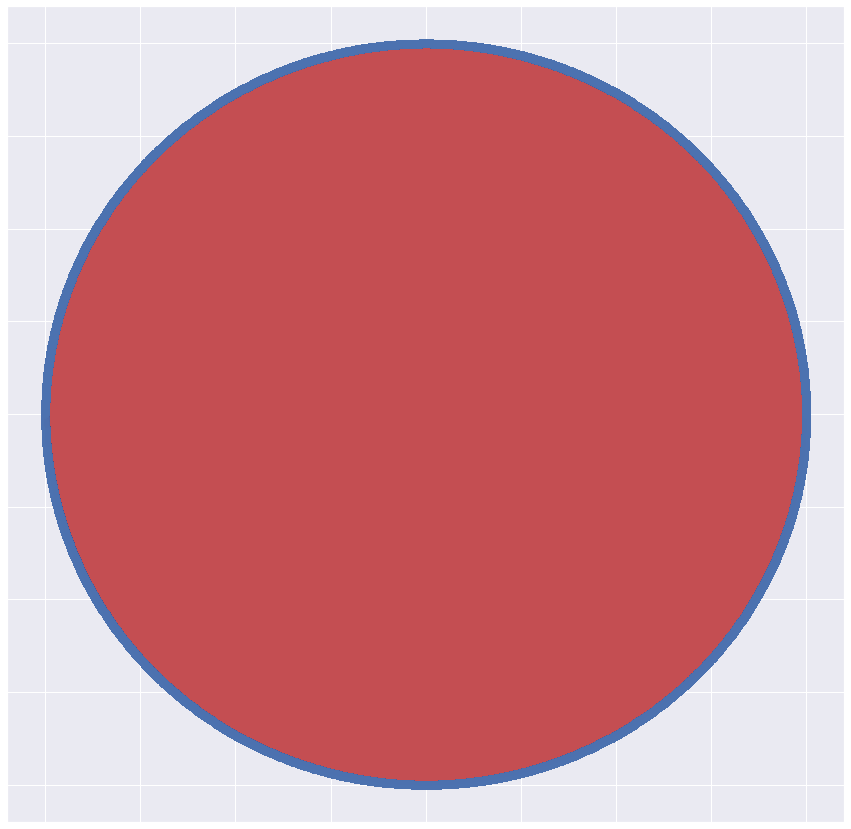

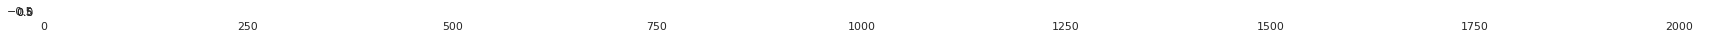

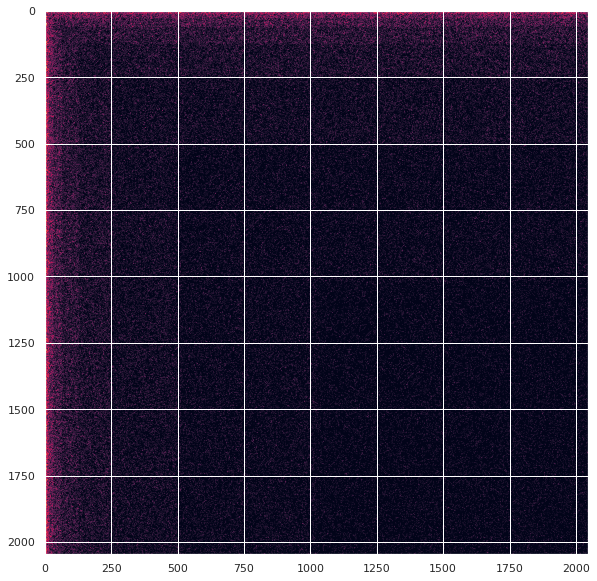

In [ ]:
G, x_axis, y_axis, height_histogram, nodelist, H, b, c1, c2, n_i = generate_igam2(H=10, b=2, c1=1.5, c2=1.5)
plot_igam2(G, x_axis, y_axis, height_histogram, nodelist, H, b, c1, c2, n_i, suffix='_simple_igam')

We also give a plot of IGAM2 with $b = 3$, $H = 6$, $H_0 = 2$, $c_1 = 1.5$ and $c_2 = 2.5$. The core-periphery pattern is evident by observing the adjacency matrix plot.

Diameter: 3
Theoretical Diameter: 6.025685102665476


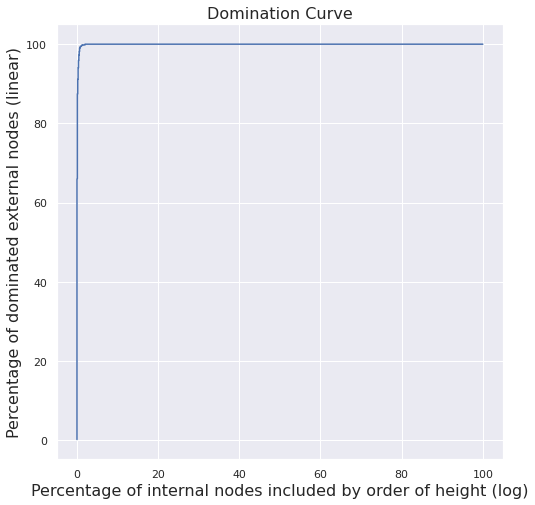

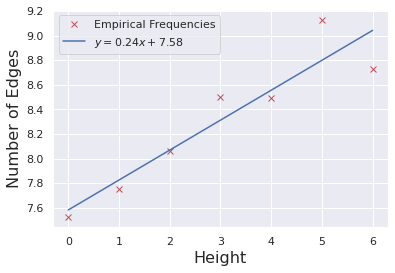

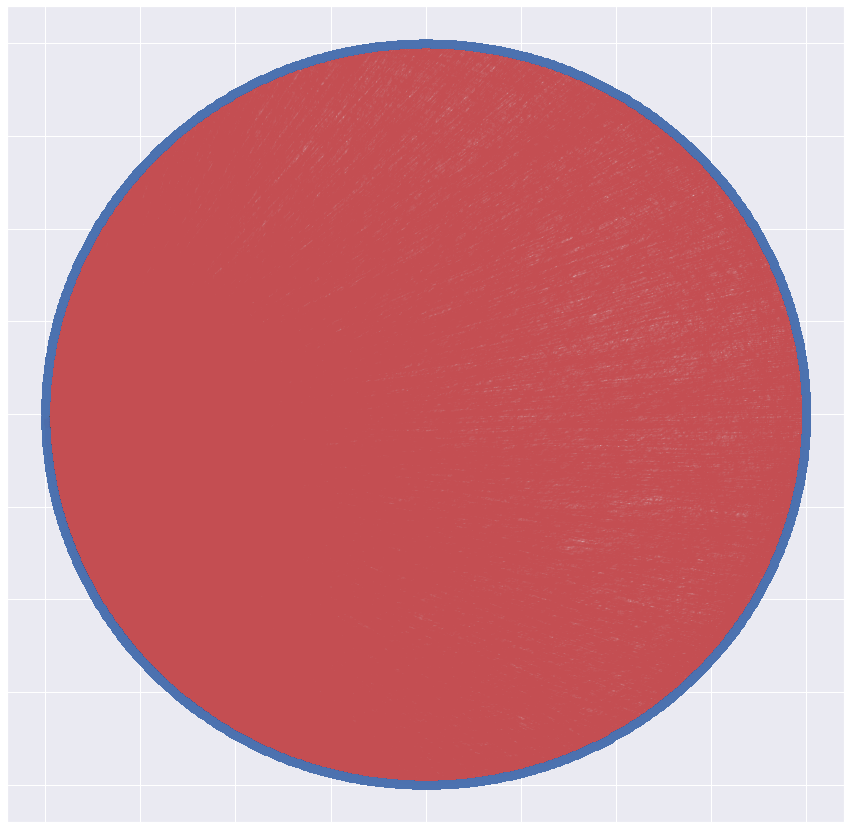

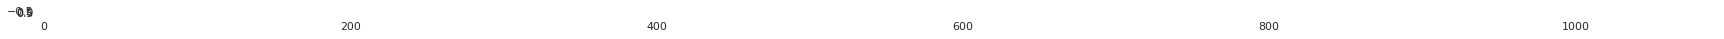

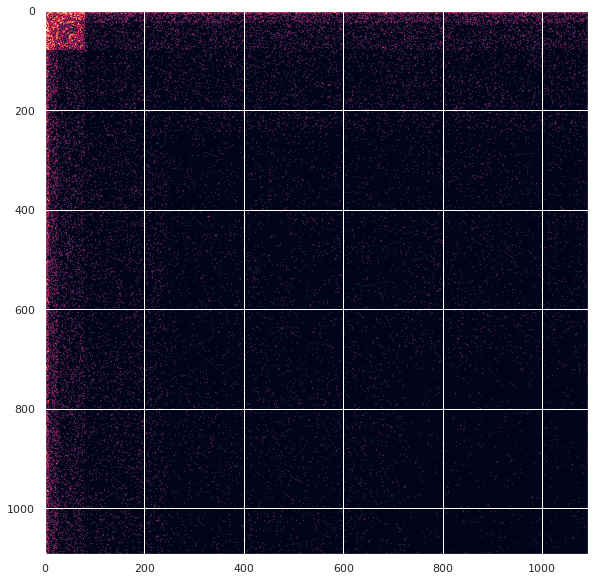

In [ ]:
G, x_axis, y_axis, height_histogram, nodelist, H, b, c1, c2, n_i = generate_igam2(H=6, b=3, c1=1.5, c2=2.5, H0=2)
plot_igam2(G, x_axis, y_axis, height_histogram, nodelist, H, b, c1, c2, n_i, suffix='_simple_igam')

## Average degree of IGAM

We provide plots of the average degree distribution of the IGAM model. We remind that the average degree at height $h$ is given as

\begin{equation*}
\begin{split}
    \bar d_h & \approx \sum_{r = 0}^H b^r c^{-\min \{ h, r \} - 1} \\
    % & = \frac 1 c \left [ \sum_{r = 0}^h (b / c)^r + \frac {1} {c^h} \sum_{r = h + 1}^H b^r \right ] \\
    & =  \frac 1 c \left [ \left ( \frac b c \right )^{h + 1} - 1 + \frac {b^{H + 1} - b^{h + 1}} {c^h} \right ] . 
\end{split}
\end{equation*}

We give a plot of $\log \bar d_h$ and observe that it is an almost linear function.

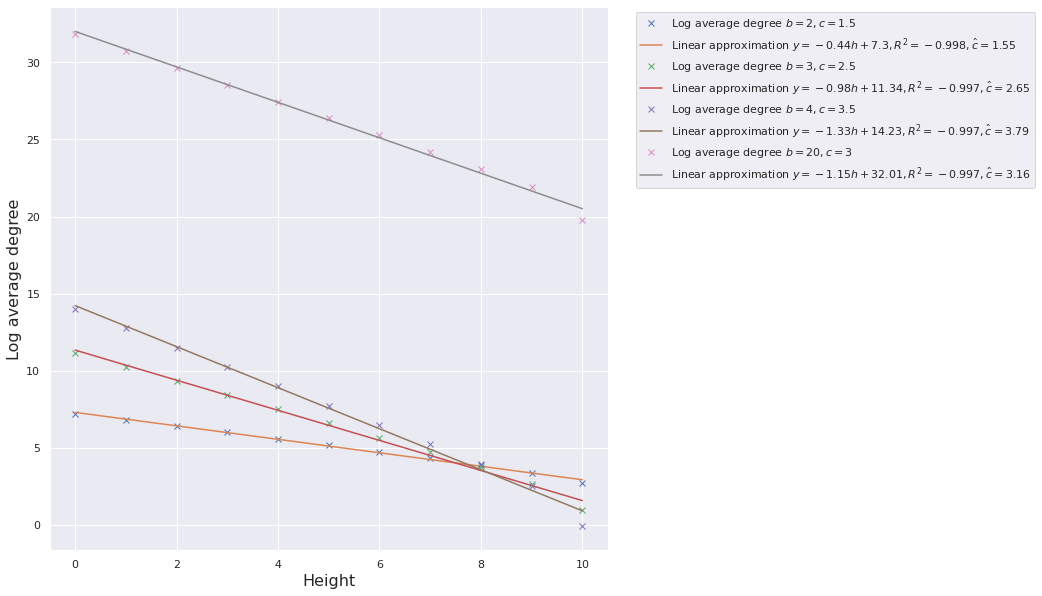

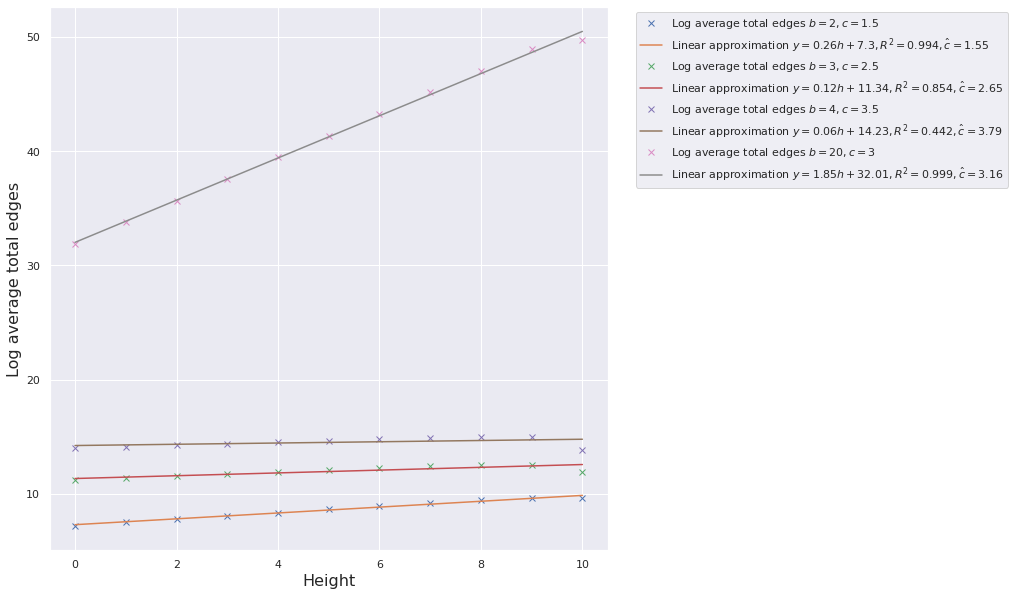

In [ ]:
def plot_average_degree(H, b, c, new_figure=False, total_edges=False):

  h = np.arange(H + 1)

  d_h = 1 / c * ((b / c)**(h + 1) - 1 + (b**(H + 1) - b**(h + 1)) / c**h )
  if total_edges:
    d_h = d_h * b**h

  log_d_h = np.log(d_h)
  r2 = np.corrcoef(h, log_d_h)[0, 1]

  p = np.polyfit(h, log_d_h, deg=1)

  y = p[0] * h + p[1]
  if total_edges:
    hat_c = b * np.exp(-p[0])
  else:
    hat_c = np.exp(-p[0])

  if new_figure:
    plt.figure()
  plt.plot(h, log_d_h, linewidth=0, marker='x', label='Log average {} $b = {}, c = {}$'.format('degree' if not total_edges else 'total edges', b, c))
  plt.plot(h, y, label='Linear approximation $y = {} h + {}, R^2 = {}, \hat c = {}$'.format(round(p[0], 2), round(p[1], 2), round(r2, 3), round(hat_c, 2)))

  plt.xlabel('Height')
  plt.ylabel('Log average {}'.format('degree' if not total_edges else 'total edges'))

  plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

plt.figure(figsize=(10, 10))
plot_average_degree(H=10, b=2, c=1.5)
plot_average_degree(H=10, b=3, c=2.5)
plot_average_degree(H=10, b=4, c=3.5)
plot_average_degree(H=10, b=20, c=3)

plt.figure(figsize=(10, 10))
plot_average_degree(H=10, b=2, c=1.5, total_edges=True)
plot_average_degree(H=10, b=3, c=2.5, total_edges=True)
plot_average_degree(H=10, b=4, c=3.5, total_edges=True)
plot_average_degree(H=10, b=20, c=3, total_edges=True)

## Fitting 

We present the fitting algorithm for IGAM. The algorithm has $O(n^3)$ complexity. The algorithm's steps are as follows

1. The input is provided as a dataset of $m$ edges $\mathcal D = \{ e_1, \dots, e_m \}$.
2. Calculate the degree $\bar y_u$ of every node $u$ in the sample.
3. We sort the degrees in descending order. 
4. For all fanouts $b \in \{ 2, \dots, n - 1 \}$
  1. We build a tree by attributing heights to the nodes in descending order of their degree
  2. We calculate $\bar z_h = \log \left ( \sum_{u: h(u) = h} \bar y_u \right )$, that is the log-total number of edges on level $h$ as indicated by the samples.
  3. We fit a linear least squares relation between $h$ and $\bar z_h$ that has the form $\hat z_h = a h + b$
  4. We calculate $c = b \cdot e^{-a}$, since the slope $a$ is roughly $\log (b / c)$.  
  5. We calculate the likelihood of the parametrization which equals 

  $$\sum_{u, v} \frac {\left ( \mathbf 1 \{(u, v) \in \mathcal D \} \log ( c^{-1 - \min \{ h(u), h(v) \}}) + (1 - \mathbf 1 \{ (u, v) \notin \mathcal D \}) \log (1 - c^{-1 - \min \{ h(u), h(v) \}} ) \right )} {2}  $$

5. We return the set of parameters that maximize the computed likelihood.

In [ ]:
# Fitting
def igam_fit(G, max_iters=-1):

  # Sample degree calculation
  degrees = list(sorted([(u, G.degree(u)) for u in G], key=lambda x: -x[1]))
  
  max_log_likelihood = - np.inf
  argmax_log_likelihood = (None, None, None)

  if max_iters <= 0:
    max_iters = len(G)

  for b in range(2, max_iters + 1):
    heights = {}
    h = 0
    i = 0    
    # Give heights to everyone
    while i < len(G):
      for j in range(b**h):
        heights[degrees[i][0]] = h
        i += 1
        if i >= len(G):
           break
      h += 1

    # Calculate least squares fit for c
    frequencies = np.zeros(h)

    for u in G:
      frequencies[heights[u]] += G.degree(u)

    frequencies = frequencies / frequencies.sum()
    height_range = np.arange(len(frequencies))

    p = np.polyfit(height_range, np.log(frequencies), deg=1)
    
    a = p[0]
    
    c = b * np.exp(-a)

    if 1 < c < b:
      log_likelihood = 0

      for u in G:
        for v in G:
          if u != v:
            if G.has_edge(u, v):
              log_likelihood += (-1 - min(heights[u], heights[v])) * np.log(c)
            else:
              log_likelihood += np.log(1 - c**(-1 - min(heights[u], heights[v])))

      log_likelihood /= 2  

      if log_likelihood >= max_log_likelihood:
        max_log_likelihood = log_likelihood
        argmax_log_likelihood = (b, c, h)

  return argmax_log_likelihood, max_log_likelihood

## Fitting real-world data

We fit real world data. To be able to see the fits please change the path that the data are located. If the data is loaded successfully, you should be able to reproduce the plots of the paper.

Name: world-trade, n = 76, m = 845
Name: airports, n = 210, m = 2429
Name: cs-faculty, n = 205, m = 2861
Name: history-faculty, n = 145, m = 2334
Name: business-faculty, n = 113, m = 3027
Name: polblogs, n = 852, m = 15956


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:118: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:119: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:118: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:119: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:118: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:119: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:118: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:119: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launche

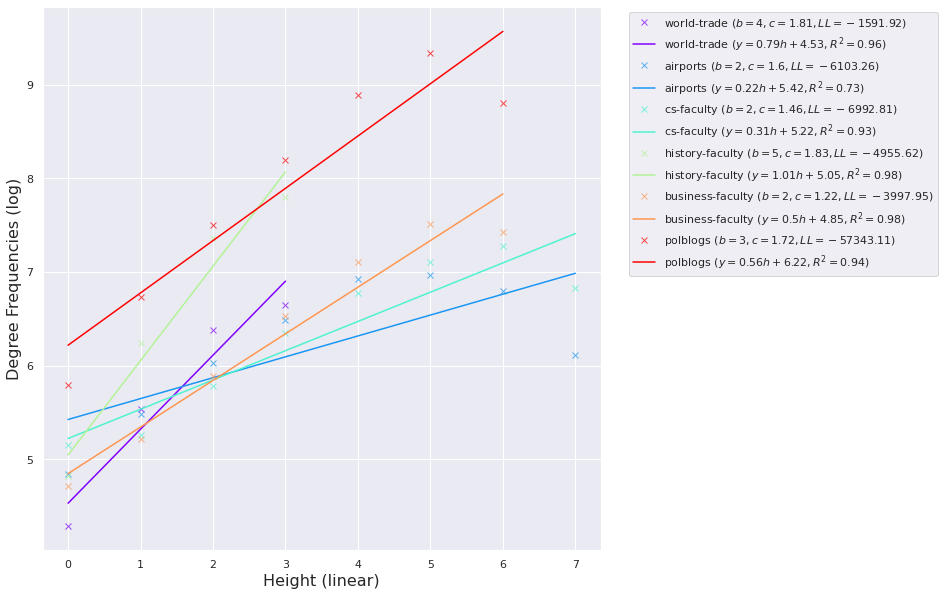

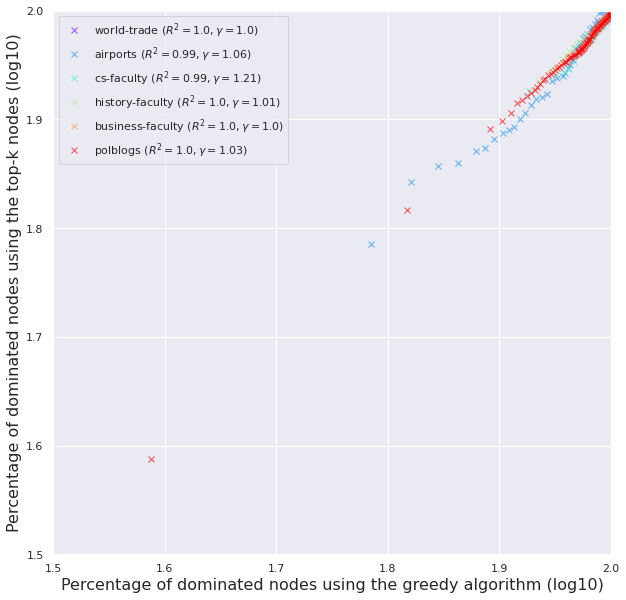

In [ ]:
def load_world_trade(location='datasets/world-trade/world-trade.csv'):
  df = pd.read_csv(location)
  G = nx.convert_matrix.from_pandas_edgelist(df, source='from', target='to')
  return G

def load_faculty(location='datasets/faculty/ComputerScience_edgelist.txt'):
  df = pd.read_csv(location, sep='\t')
  G = nx.convert_matrix.from_pandas_edgelist(df, source='# u', target='v')
  return G

def load_polblogs(location='datasets/polblogs/polblogs.mtx'):
  df = pd.read_csv(location, sep=' ', comment='%', header=None)
  G = nx.convert_matrix.from_pandas_edgelist(df, source=0, target=1)
  return G

def load_airports(location='data/airports/USairport500.txt'):
  df = pd.read_csv(location, sep=' ', header=None)
  G = nx.convert_matrix.from_pandas_edgelist(df, source=0, target=1)
  return G

def filter_nodes(G, threshold=4):
  filtered_nodes = []
  for v in G:
    if G.degree(v) <= threshold:
      filtered_nodes.append(v)
  G.remove_nodes_from(filtered_nodes)
  return G  

def dominating_set(G, method='greedy'):
    x_axis = 1 + np.arange(len(G))
    y_axis = np.zeros_like(x_axis)
    n = len(G)

    if method == 'topk':
      degrees = list(sorted([(u, G.degree(u)) for u in G], key=lambda x: -x[1]))

    i = 0
    j = 0
    while len(G) > 0:
      if method == 'greedy':       
        max_degree = 0
        current = None
        for u in G:
          if G.degree(u) >= max_degree:
            max_degree = G.degree(u)
            current = u
      elif method == 'topk':
        while not G.has_node(degrees[j][0]):
          j += 1
        current, _ = degrees[j]

      closed_neighborhood = [current] + [neigh for neigh in G[current]]
      y_axis[i] = n - len(G)
      G.remove_nodes_from(closed_neighborhood)    
      i += 1

    y_axis[i:] = n
    y_axis = y_axis / n * 100
    x_axis = x_axis / n * 100

    return dominating_set, x_axis, y_axis  

def fit_datasets(datasets):
  plt.figure(figsize=(10, 10))
  colors = iter(cm.rainbow(np.linspace(0, 1, len(datasets))))

  for G, name, max_iters in datasets: 
    print('Name: {}, n = {}, m = {}'.format(name, len(G), len(G.edges())))
    argmax_log_likelihood, max_log_likelihood = igam_fit(G, max_iters=max_iters)
    degrees = list(sorted([(u, G.degree(u)) for u in G], key=lambda x: -x[1]))

    b, c, _ = argmax_log_likelihood
    color = next(colors)
    heights = {}
    h = 0
    i = 0    
    # Give heights to everyone
    while i < len(G):
      for j in range(b**h):
        heights[degrees[i][0]] = h
        i += 1
        if i >= len(G):
           break
      h += 1

    # Calculate least squares fit for c
    frequencies = np.zeros(h)

    for u in G:
      frequencies[heights[u]] += G.degree(u)

    height_range = np.arange(len(frequencies))

    r2 = np.corrcoef(height_range, np.log(frequencies))[0, 1]

    p = np.polyfit(height_range, np.log(frequencies), deg=1)
    y = p[0] * height_range + p[1]

    plt.plot(height_range, np.log(frequencies), linewidth=0, marker='x', alpha=0.7, c=color, label='{} ($b = {}, c = {}, LL = {}$)'.format(name, b, round(c, 2), round(max_log_likelihood, 2)))
    plt.plot(height_range, y, c=color, label='{} ($y = {} h + {}, R^2 = {}$)'.format(name, round(p[0], 2), round(p[1], 2), round(r2, 2)))
    
  plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

  plt.ylabel('Degree Frequencies (log)')
  plt.xlabel('Height (linear)')

  plt.savefig('igam_fit.png')

  plt.figure(figsize=(10, 10))
  

  colors = iter(cm.rainbow(np.linspace(0, 1, len(datasets))))

  for G, name, _ in datasets:
    color = next(colors)
    _, x_axis_greedy, y_axis_greedy = dominating_set(G.copy(), method='greedy')
    _, x_axis_top_k, y_axis_top_k = dominating_set(G.copy(), method='topk')
    log_greedy = np.log10(y_axis_greedy)
    log_top_k = np.log10(y_axis_top_k)

    log_greedy = log_greedy[np.isfinite(log_greedy)]
    log_top_k = log_top_k[np.isfinite(log_top_k)]
    r2 = np.corrcoef(log_greedy, log_top_k)[0, 1]
    p = np.polyfit(log_greedy, log_top_k, deg=1)
    plt.plot(log_greedy, log_top_k, linewidth=0, c=color, alpha=0.7, marker='x', label='{} ($R^2 = {}, \gamma = {}$)'.format(name, round(r2, 2), round(p[0], 2)))


  plt.legend()
  plt.xlabel('Percentage of dominated nodes using the greedy algorithm (log10)')
  plt.ylabel('Percentage of dominated nodes using the top-k nodes (log10)')
  plt.xlim(1.5, 2)
  plt.ylim(1.5, 2)

  plt.savefig('dominating_set.png')

datasets = [
  (filter_nodes(load_world_trade()), 'world-trade', -1),
  (filter_nodes(load_airports()), 'airports', 20),
  (filter_nodes(load_faculty()), 'cs-faculty', -1),
  (filter_nodes(load_faculty(location='data/faculty/History_edgelist.txt')), 'history-faculty', -1),
  (filter_nodes(load_faculty(location='data/faculty/Business_edgelist.txt')), 'business-faculty', -1),
  (filter_nodes(load_polblogs()), 'polblogs', 20)
]
    
fit_datasets(datasets)


## Simple Version

We present a simpler (**different than the one presented in the paper**) version of the IGAM model to get intuition. More specifically, the model starts with the same tree of height $H$ and fanout $b$. The last level of the tree contains $n_P = b^H$ nodes and for each leaf node $u$ is connected with an internal node $v$ of height $h(v) = h$ with probability $$f(u, v) = c^{-1-h}$$ where $1 < c < b$.

Finally, we delete the edges of the tree skeleton, as we do in the general case of IGAM. We plot a version of the model for $b = 2$ and $c = 1.5$. 

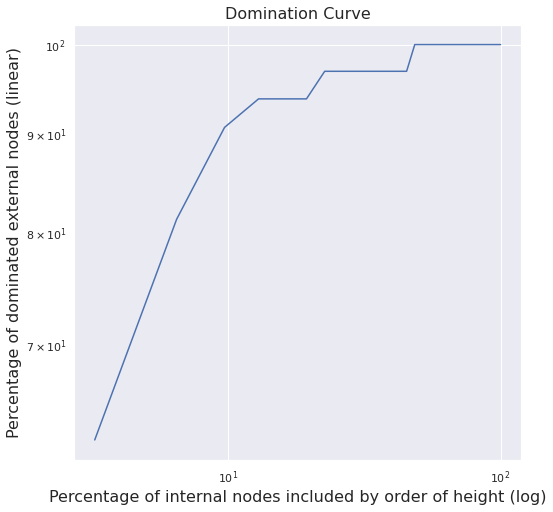

<Figure size 432x288 with 0 Axes>

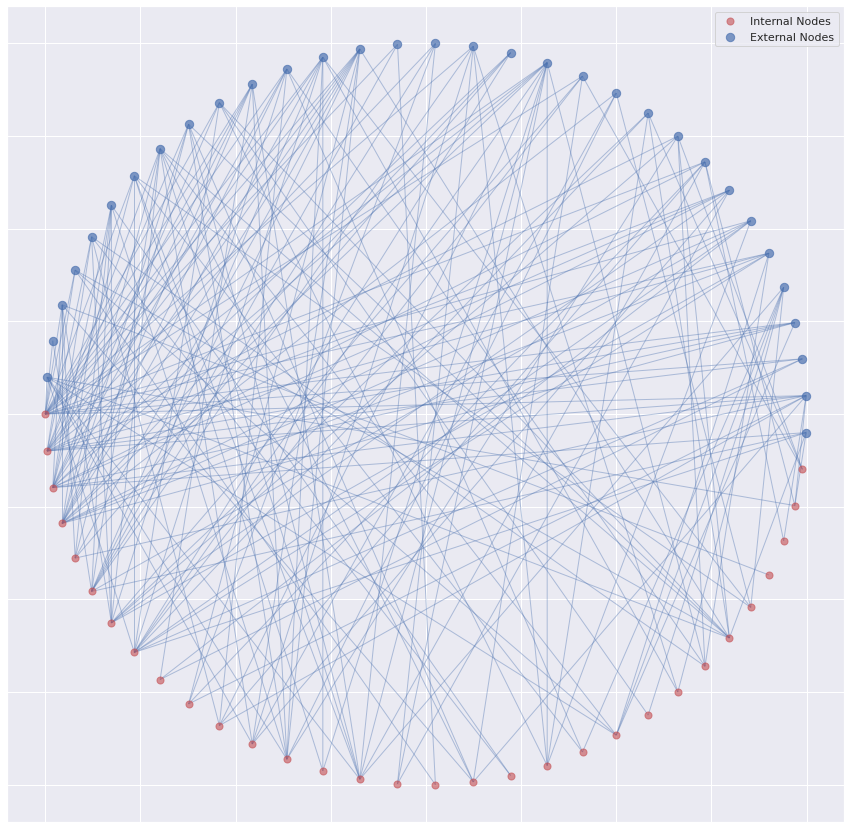

In [ ]:
def generate_simple_igam(H=5, b=2, c=1.5):
  G = nx.generators.classic.balanced_tree(r=b, h=H)
  tree_edges = list(G.edges())
  n_i = b**H
  black = collections.defaultdict(bool)
  x_axis, y_axis = [], []
  edges_int = G.edges()
  edges_rnd = []

  for counter in range(n_i - 1):
    h = np.floor(np.log(counter + 1) / np.log(b))
    for child in range(b**(H) - 1, b**(H + 1) - 1):
      un = np.random.uniform(low=0, high=1)
      if un <= c**(-h-1):
        G.add_edge(counter, child)
        edges_rnd.append((counter, child))
        black[child] = True
    x_axis.append((counter + 1))
    y_axis.append(len(black))

  G.remove_edges_from(tree_edges)

  x_axis = np.array(x_axis)
  y_axis = np.array(y_axis)

  x_axis = x_axis / x_axis[-1] * 100
  y_axis = y_axis / y_axis[-1] * 100

  return G, x_axis, y_axis, H, b, c, n_i

def plot_simple_igam(G, x_axis, y_axis, H, b, c, n_i, suffix=''):

  plt.figure(figsize=(8, 8))
  plt.title('Domination Curve')
  plt.ylabel('Percentage of dominated external nodes (linear)')
  plt.xlabel('Percentage of internal nodes included by order of height (log)')
  plt.loglog(x_axis, y_axis)
  plt.savefig('iga_curve{}.png'.format(suffix), dpi=1200)
  plt.figure()
  degrees = np.array([G.degree(u) for u in G])

  fig, ax = plt.subplots(1, 1, figsize=(15, 15))
  pos = nx.shell_layout(G)
  nx.draw_networkx_nodes(G, nodelist=list(range(n_i - 1)), ax=ax, pos=pos, node_color='r', node_size=50, alpha=0.6, label='Internal Nodes')
  nx.draw_networkx_nodes(G, nodelist=list(range(b**(H) - 1, b**(H + 1) - 1)), ax=ax, pos=pos, node_color='b', node_size=70, alpha=0.7, label='External Nodes')
  nx.draw_networkx_edges(G, edgelist=G.edges(), edge_color='b', pos=pos, alpha=0.4)
  plt.legend()
  plt.savefig('iga{}.png'.format(suffix), dpi=1200)

G, x_axis, y_axis, H, b, c, n_i = generate_simple_igam()
plot_simple_igam(G, x_axis, y_axis, H, b, c, n_i)  